## Introduction: Brain Tumor Detection Using CNN
Brain tumor is one of the most life-threatening diseases that causes abnormal cell growth in the brain, which can significantly affect a person’s health and well-being. Early detection of brain tumors is crucial for proper diagnosis and treatment. Traditionally, diagnosis is performed by radiologists through MRI scans, which is a time-consuming and error-prone process.

With the advancement of Artificial Intelligence (AI) and Deep Learning, especially using Convolutional Neural Networks (CNN), it has become possible to automate the detection of brain tumors from MRI images with high accuracy. In this project, we have used a deep learning approach to classify brain MRI images into four categories — Glioma, Meningioma, Pituitary, and No Tumor.

The dataset used for this project is collected from a publicly available source on Kaggle, and includes both training and testing images. The goal of this project is to build a robust CNN model that can identify tumor types with minimal human intervention, thereby assisting radiologists in making faster and more accurate decisions.


#### date 11th july 2025 



In [28]:
import os
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

print("all libraries imported")

all libraries imported


### Data Loading and Preprocessing
The dataset is sourced from Kaggle, and we utilize the cv2 library to load and resize the images. Finally, the data is split into training and testing sets using train_test_split to evaluate the model's performance effectively.

In this section, we are loading the brain MRI images for training and testing from the Kaggle dataset. The dataset consists of four categories: Glioma, Meningioma, No Tumor, and Pituitary.

Image Resizing: Each image is resized to 150x150 pixels to ensure uniform input size for the model.
Loading Training Data: We loop through the Training folder, loading images from each category and resizing them. These images are stored in the X_train list, while their corresponding labels (Glioma, Meningioma, No Tumor, Pituitary) are added to the Y_train list.
Loading Testing Data: Similarly, images from the Testing folder are loaded, resized, and appended to X_train and Y_train.
Finally, both the training images (X_train) and their labels (Y_train) are converted into NumPy arrays to ensure compatibility with machine learning models.

In [29]:
import os
import cv2
import numpy as np

X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load Training Images
for label in labels:
    folderPath = os.path.join('/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Training_150', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

# Load Testing Images
for label in labels:
    folderPath = os.path.join('/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Testing_150', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

print("all images resized and saved in ")


## Data Splitting

We split the dataset into training and testing sets. 90% of the data is used for training the model, and 10% is used for testing. This helps evaluate the model's performance on unseen data, ensuring that it can generalize well. The `train_test_split` function from `sklearn.model_selection` is used to perform this split, with a random seed of 101 for reproducibility.

- `X_train`: The images used for training.
- `X_test`: The images used for testing.
- `Y_train`: Labels corresponding to the training images.
- `Y_test`: Labels corresponding to the testing images.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

print("Dataset splitted")


## Convert categorical labels to one-hot encoded format
In this section, we convert the labels of the training and testing datasets into numerical indices using the `labels` list. This is necessary because the neural network requires numerical values rather than string labels. If the labels in `Y_train` and `Y_test` are in string format, we map each label to an integer index corresponding to its position in the `labels` list (e.g., 'glioma' -> 0, 'meningioma' -> 1, etc.).

After converting the labels into integer indices, we then use the `to_categorical` function from TensorFlow's `keras.utils` to convert the labels into one-hot encoded format. One-hot encoding is commonly used for multi-class classification problems as it represents the class labels as binary vectors.

- `Y_train`: One-hot encoded labels for the training data.
- `Y_test`: One-hot encoded labels for the testing data.


In [ ]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

if isinstance(Y_train[0], str):
    Y_train_new = []
    for i in Y_train:
        Y_train_new.append(labels.index(i))
    Y_train = Y_train_new

if isinstance(Y_test[0], str):
    Y_test_new = []
    for i in Y_test:
        Y_test_new.append(labels.index(i))
    Y_test = Y_test_new

import tensorflow as tf
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)


## Convolutional Neural Network architecture

### merged from resnet50 and efficientnet15 architectures 

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))    
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))

print("architecture created")



/home/petpooja/miniconda3/envs/ds_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compilation
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [35]:
# Training
history = model.fit(X_train,Y_train,epochs=20,validation_split=0.1)

Epoch 1/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.3499 - loss: 1.8672 - val_accuracy: 0.4854 - val_loss: 1.1745
Epoch 2/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.6740 - loss: 0.7801 - val_accuracy: 0.6375 - val_loss: 0.8281
Epoch 3/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.7539 - loss: 0.5925 - val_accuracy: 0.6926 - val_loss: 0.8222
Epoch 4/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.7987 - loss: 0.4971 - val_accuracy: 0.6456 - val_loss: 0.8439
Epoch 5/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.8294 - loss: 0.4047 - val_accuracy: 0.7621 - val_loss: 0.5552
Epoch 6/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.8495 - loss: 0.3948 - val_accuracy: 0.7735 - val_loss: 0.5779
Epoch 7/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.8810 - loss: 0.3237 - val_accuracy: 0.8414 - val_loss: 0.3927
Epoch 8/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.8964 - loss: 0.2920 - val_accu

## accuracy

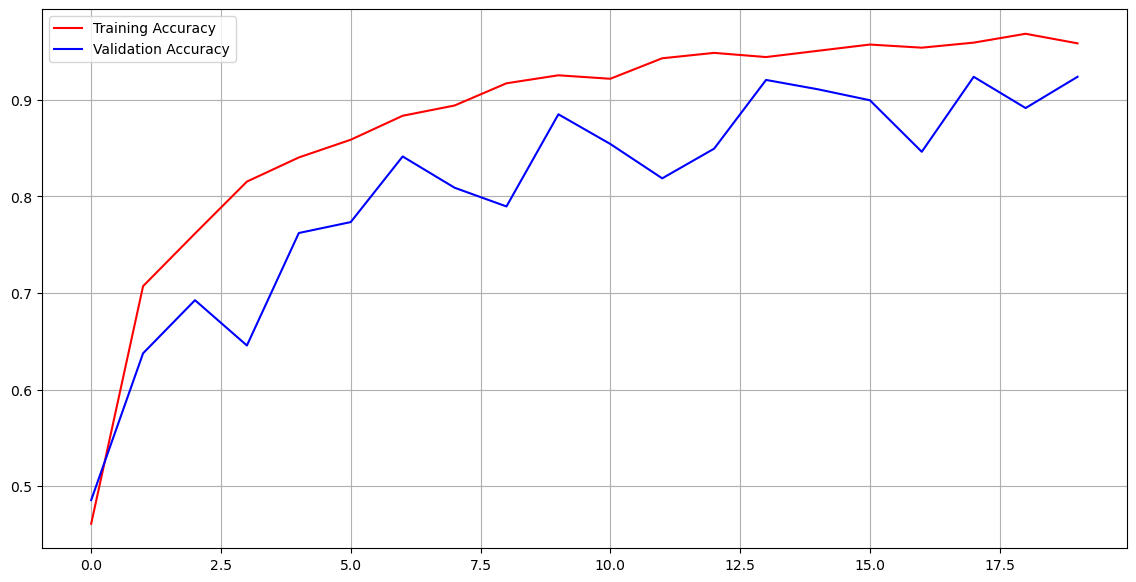

In [39]:
import matplotlib.pyplot as plt 

model.save('braintumor96.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")  
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Model Saving and Training vs. Validation Accuracy
After training, the model is saved as `braintumor.h5` for future use.

The plot shows the **Training Accuracy** (red curve) and **Validation Accuracy** (blue curve) over the epochs. 

- If validation accuracy is lower than training accuracy, it could indicate overfitting. 
- In this case, both accuracies increase steadily, suggesting the model is learning well and generalizing to new data.

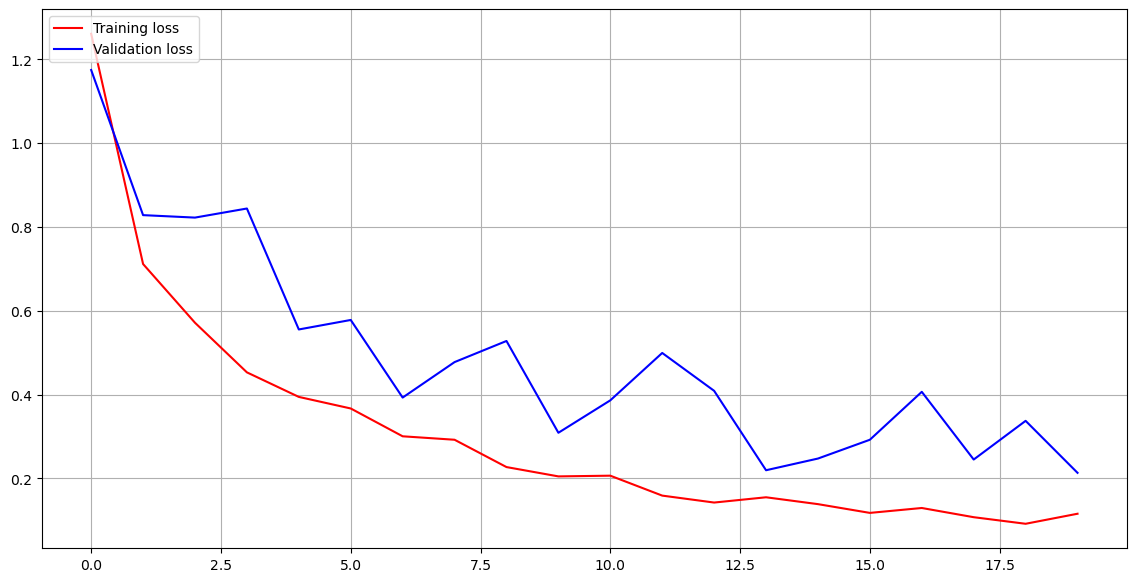

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training loss")  
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## Training and Validation Loss Visualization
We also plotted the **Training Loss** (red curve) and **Validation Loss** (blue curve) over the epochs.

- The plot helps visualize how the model's loss decreased during training and how well it performed on validation data.
- A steady decrease in both training and validation loss indicates that the model is improving and generalizing well to unseen data.


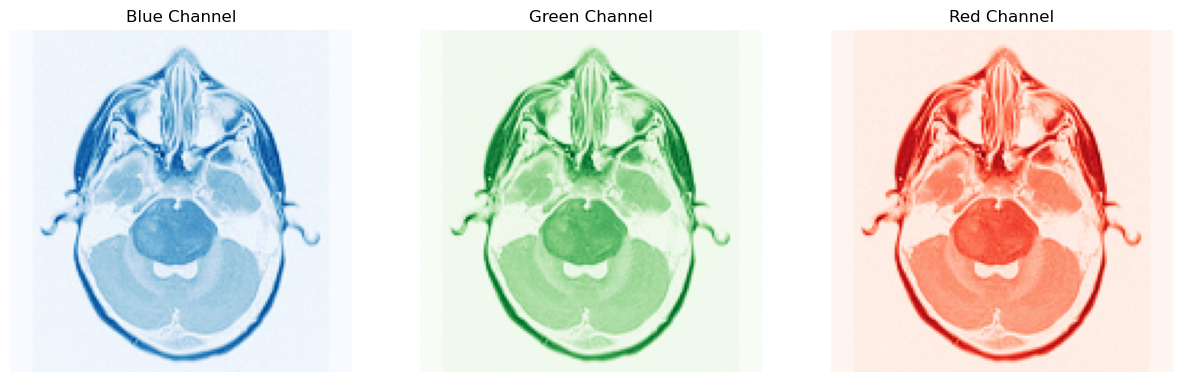

In [38]:
img = cv2.imread('/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Testing_150/meningioma/Te-me_0019.jpg')

img_resized = cv2.resize(img, (150, 150))

b, g, r = cv2.split(img_resized)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(b, cmap='Blues')
axs[0].set_title('Blue Channel')
axs[0].axis('off')

axs[1].imshow(g, cmap='Greens')
axs[1].set_title('Green Channel')
axs[1].axis('off')

axs[2].imshow(r, cmap='Reds')
axs[2].set_title('Red Channel')
axs[2].axis('off')

plt.show()


## Confusion matrix

A confusion matrix is a tool that helps to evaluate the performance of a model, particularly for classification problems. It compares the actual and predicted labels, and generates a table that summarizes the correct and incorrect predictions.

Here is an example of a basic confusion matrix:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

- **True Positive (TP)**: The model correctly predicted the positive class.
- **True Negative (TN)**: The model correctly predicted the negative class.
- **False Positive (FP)**: The model incorrectly predicted the positive class.
- **False Negative (FN)**: The model incorrectly predicted the negative class.

Using the confusion matrix, you can calculate various performance metrics like accuracy, precision, recall, F1-score, etc.


22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step


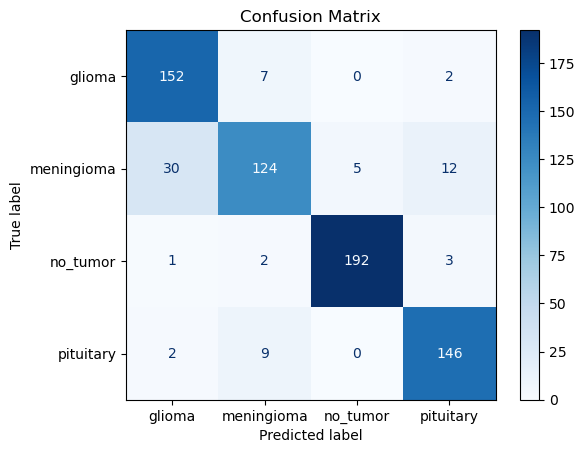

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)  
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)         

cm = confusion_matrix(y_true, y_pred_classes)

class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## Visualizing the Input Image Before Prediction
The image is loaded using Keras' `load_img` function and displayed using Matplotlib. This allows us to visualize the input image before passing it to the model.


## Model Prediction and Class Index Determination
The model's prediction is obtained using `model.predict()` on the reshaped image array. The predicted class index is determined by finding the index with the highest probability using `argmax()`.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


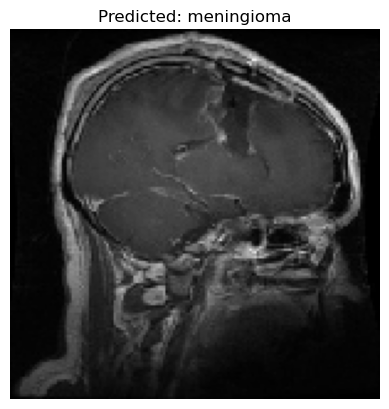

Prediction Probabilities: [[0.14884844 0.6104551  0.23067477 0.01002164]]
Predicted Class: meningioma


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
model = load_model(r"/home/petpooja/Documents/other projects/brain_tumor_project/braintumor96.h5") 
img_path = input("input your image path :")


class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150,150))  
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, img

# Predict and show result
def predict_image(img_path):
    processed_img, original_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

    print("Prediction Probabilities:", prediction)
    print("Predicted Class:", predicted_class)

predict_image(img_path)  


## Thank You!

##### Bhaskar D Barot (DS)
